In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

In [2]:
def plot_ellipse(mean, cov, ax, color):
    """Gambar ellipse berdasarkan mean dan covariance matrix"""
    lambda_, v = np.linalg.eigh(cov)
    lambda_ = np.sqrt(lambda_)
    
    ell = Ellipse(xy=mean, width=lambda_[0]*4, height=lambda_[1]*4, 
                  angle=np.degrees(np.arctan2(v[1, 0], v[0, 0])), 
                  edgecolor=color, facecolor='none', linewidth=2)
    ax.add_patch(ell)

In [3]:
# Load dataset iris
iris = datasets.load_iris()
X = iris.data  # Menggunakan semua 4 fitur

In [4]:
# Reduksi dimensi dengan PCA ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [5]:
# Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

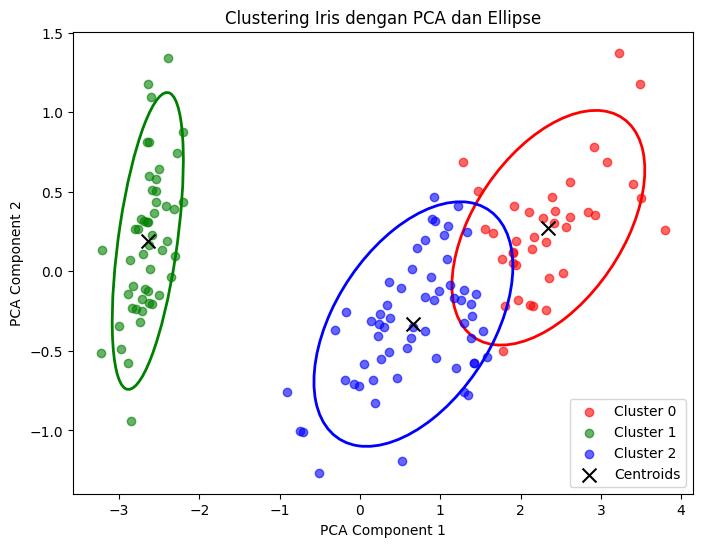

In [8]:
# Visualisasi hasil clustering
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['r', 'g', 'b']

for i in range(3):
    cluster_points = X_pca[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.6)
    
    # Perhitungan covariance dan ellipse
    cov = np.cov(cluster_points, rowvar=False)
    plot_ellipse(centers[i], cov, ax, colors[i])

ax.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centroids')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.legend()
plt.title('Clustering Iris dengan PCA dan Ellipse')
plt.show()